In [19]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [3]:


data = {'Individual': [1,2,3,4,5,6,7,8,9], 
        'Variant': ['A/A','B/B','B/B','A/B','B/B','A/A','A/B','A/B','B/B'],
        'Value': [12.3,10.2,9.9,11.3,9.5,14.2,10.2,13.1,14.0]}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the output.  
print(df)  

   Individual Variant  Value
0           1     A/A   12.3
1           2     B/B   10.2
2           3     B/B    9.9
3           4     A/B   11.3
4           5     B/B    9.5
5           6     A/A   14.2
6           7     A/B   10.2
7           8     A/B   13.1
8           9     B/B   14.0


**This data represents a specific position in the genome sequence for all individuals (persons)**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


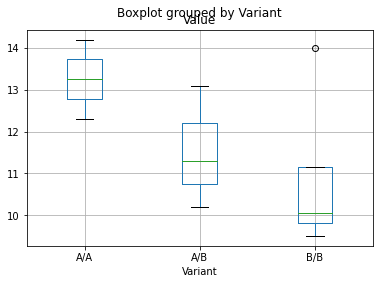

In [4]:
df.boxplot(column = 'Value', by = 'Variant')

In [5]:
means = df.groupby(['Variant']).mean().reset_index()
print(means)

  Variant  Individual      Value
0     A/A    3.500000  13.250000
1     A/B    6.333333  11.533333
2     B/B    4.750000  10.900000


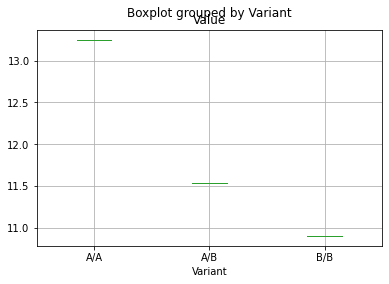

In [6]:
means.boxplot(column = 'Value', by = 'Variant')

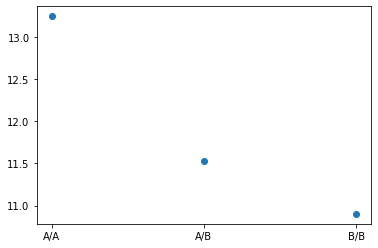

In [7]:
plt.scatter(x=means['Variant'], y=means['Value'])

In [8]:
print(means)

  Variant  Individual      Value
0     A/A    3.500000  13.250000
1     A/B    6.333333  11.533333
2     B/B    4.750000  10.900000


In [13]:
weight = []
for row in means['Variant']:
  if row == 'A/A':
    weight.append(0)
  if row == 'A/B':
    weight.append(1)
  if row == 'B/B':
    weight.append(2)


means['weight'] = weight
print(means) 
  

  Variant  Individual      Value  weight
0     A/A    3.500000  13.250000       0
1     A/B    6.333333  11.533333       1
2     B/B    4.750000  10.900000       2


In [25]:
x = np.asarray(means['weight']).reshape(-1,1)
y = np.asarray(means['Value'])
linear = linear_model.LinearRegression()
linear.fit(x, y)

LinearRegression()

In [26]:
y_pred = linear.predict(x)

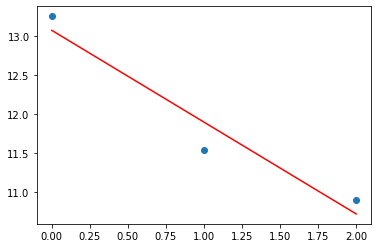

In [28]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

In [36]:
print('Slope = ', linear.coef_[0])
print('Y-intercept = ', linear.intercept_)

Slope =  -1.1749999999999994
Y-intercept =  13.069444444444443
